In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

### Top 10 personagens que estão em mais comics

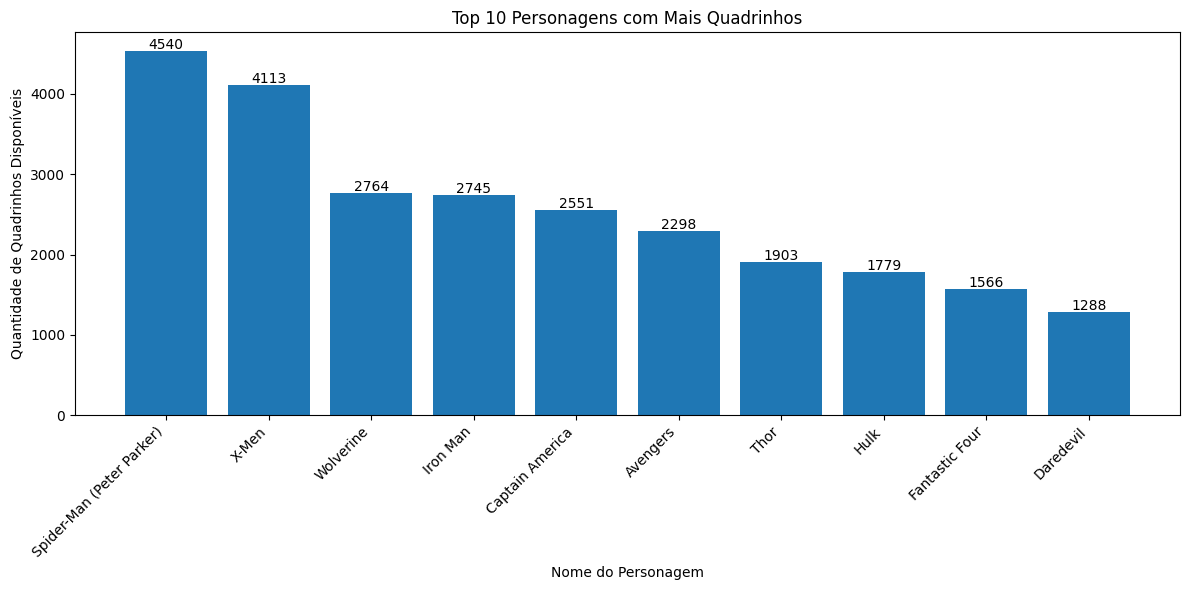

In [2]:
con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            comics_available
      FROM characters
      ORDER BY comics_available DESC
      LIMIT 10;
"""
df = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df['name'], df['comics_available'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Top 10 Personagens com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df['comics_available']):
    plt.text(i, v + 25, f"{v}", ha='center')

plt.show()

### Personagens que participaram de mais eventos

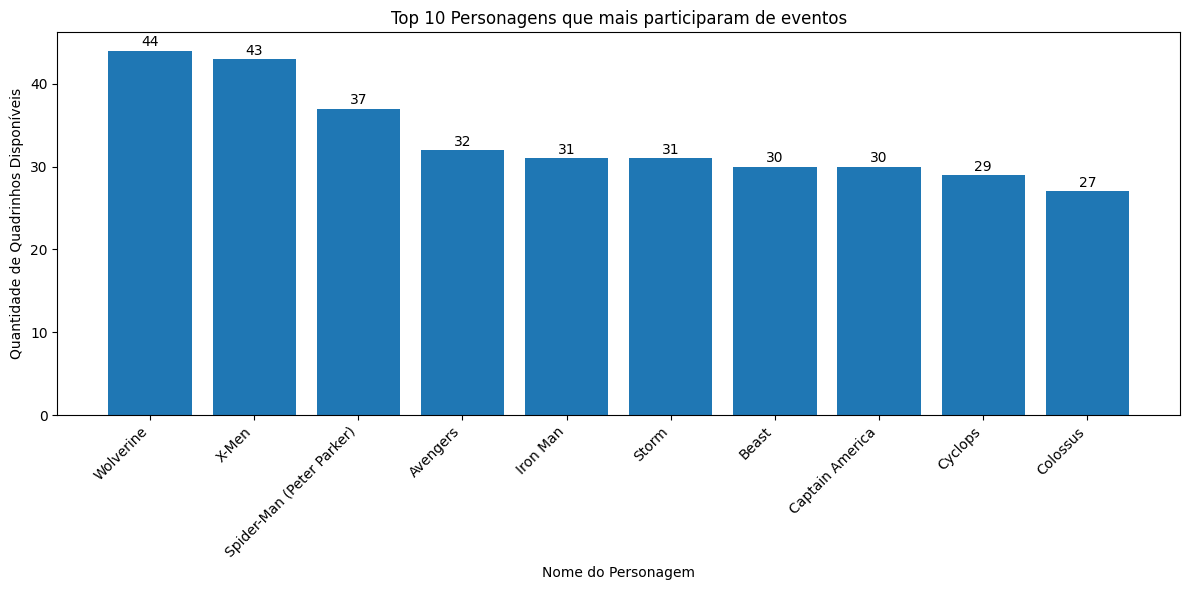

In [3]:

con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            events_available
      FROM characters
      ORDER BY events_available DESC
      LIMIT 10;
"""
df_personagens = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df_personagens['name'], df_personagens['events_available'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Top 10 Personagens que mais participaram de eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_personagens['events_available']):
    plt.text(i, v + 0.5, f"{v}", ha='center')

plt.show()

### Quantidade de participações de personagem em quadrinhos por em evento

In [4]:
conn = sqlite3.connect('banco.db')

query = """
        SELECT
            e.title AS evento,
            ch.name AS personagem,
            COUNT(*) AS total_participacoes,
            e.amount_comics AS quantidade_comics,
            ROW_NUMBER() OVER (PARTITION BY e.title ORDER BY COUNT(*) DESC) AS posicao
        FROM comics c
        JOIN characters_comics cc ON cc.comic_id = c.id
        JOIN characters ch ON cc.character_id = ch.id
        JOIN comics_events ce ON ce.comic_id = c.id
        JOIN events e ON ce.event_id = e.id
        GROUP BY e.id, e.title, ch.name
        ORDER BY quantidade_comics DESC
"""

df2 = pd.read_sql_query(query, conn)
conn.close()

In [5]:
df2

,evento,personagem,total_participacoes,quantidade_comics,posicao
0,Dark Reign,Norman Osborn,28,199,1
1,Dark Reign,Spider-Man (Peter Parker),22,199,2
2,Dark Reign,Iron Man,20,199,3
3,Dark Reign,Dark Avengers,17,199,4
4,Dark Reign,Thunderbolts,16,199,5
...,...,...,...,...,...
2783,Heroic Age,Invisible Woman,1,2,5
2784,Heroic Age,Mr. Fantastic,1,2,6
2785,Heroic Age,Secret Warriors,1,2,7
2786,Heroic Age,Thing,1,2,8


### Personagens com mais participações em eventos

In [6]:
df_grouped_by_character = df2[df2['posicao'] == 1].groupby('personagem').size().reset_index(name='vezes_mais_participacoes')
df_grouped_by_character = df_grouped_by_character.sort_values(by='vezes_mais_participacoes', ascending=False)

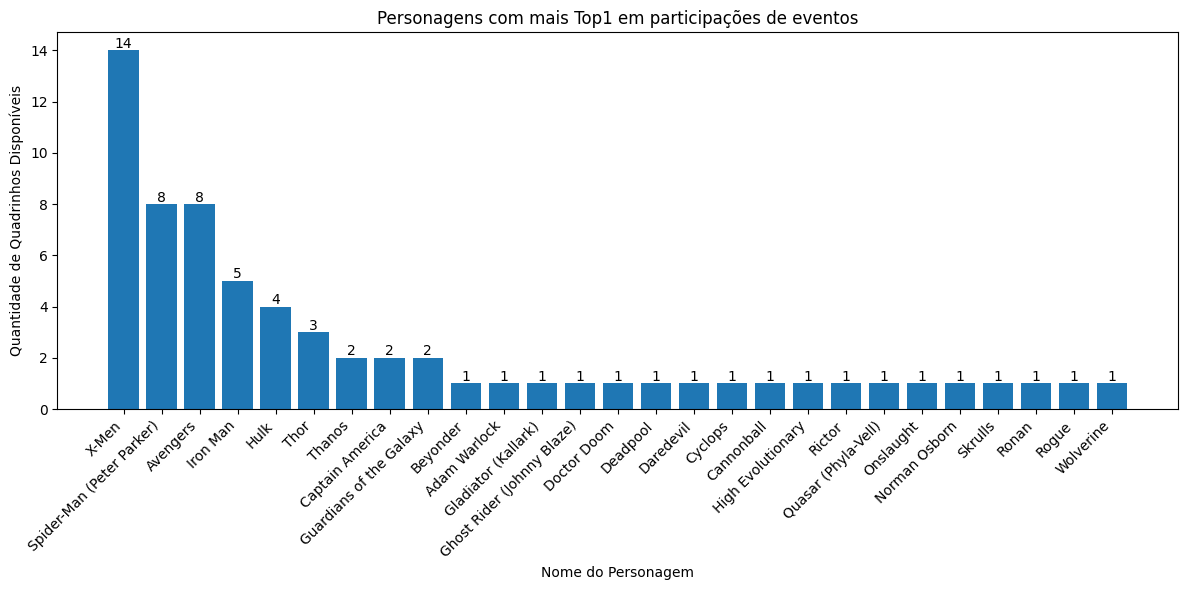

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(df_grouped_by_character['personagem'], df_grouped_by_character['vezes_mais_participacoes'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Personagens com mais Top1 em participações de eventos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_grouped_by_character['vezes_mais_participacoes']):
    plt.text(i, v + 0.1, f"{v}", ha='center')

plt.show()

### Top 10 eventos com mais quadrinhos

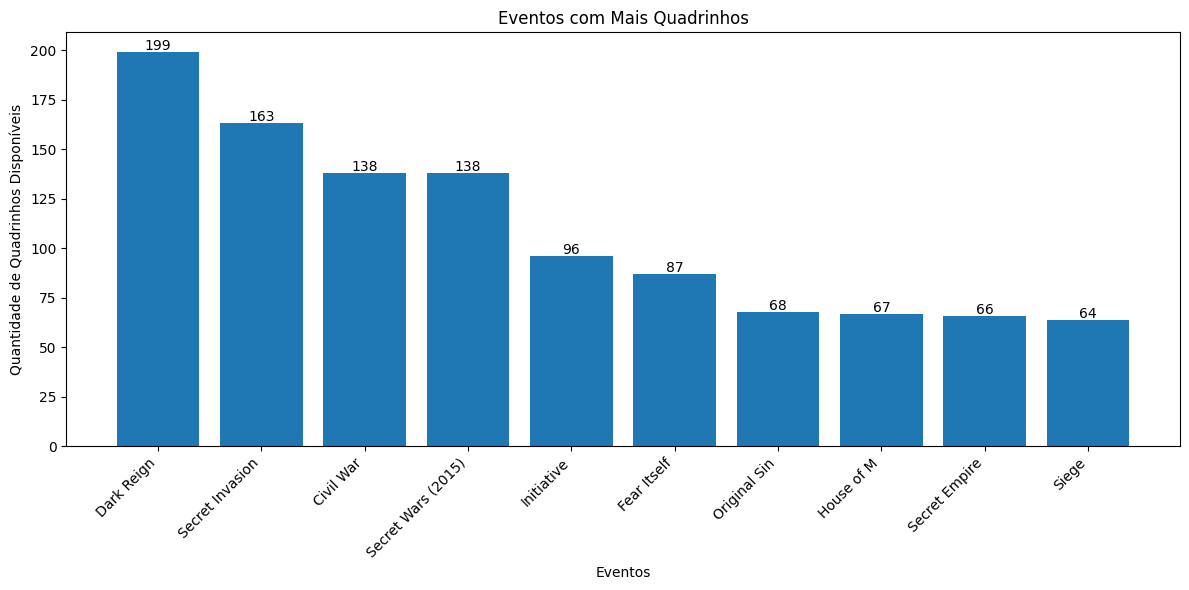

In [8]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'quantidade_comics']
df_eventos = result_df[colunas_desejadas].head(10)
df_eventos

plt.figure(figsize=(12, 6))
plt.bar(df_eventos['evento'].astype(str), df_eventos['quantidade_comics'])
plt.xlabel("Eventos")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Eventos com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(df_eventos['quantidade_comics']):
    plt.text(i, v + 1, f"{v}", ha='center')

plt.show()

### Personagens com mais participações em comics por evento

In [9]:
result_df = (df2[df2['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(25)
df_comics

,evento,personagem,total_participacoes,quantidade_comics
0,Dark Reign,Norman Osborn,28,199
1,Secret Invasion,Skrulls,40,163
2,Civil War,Iron Man,44,138
3,Secret Wars (2015),Avengers,9,138
4,Initiative,Iron Man,24,96
5,Fear Itself,Iron Man,14,87
6,Original Sin,Avengers,15,68
7,House of M,X-Men,23,67
8,Secret Empire,Captain America,13,66
9,Siege,Thor,12,64


### Top 10 personagens com mais participações no top 10 de eventos com mais quadrinhos

In [10]:
result_df = (df2[df2['posicao'].isin(range(1,11))]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
df_comics = result_df[colunas_desejadas].head(100)
df_comics.columns

Index(['evento', 'personagem', 'total_participacoes', 'quantidade_comics'], dtype='object')

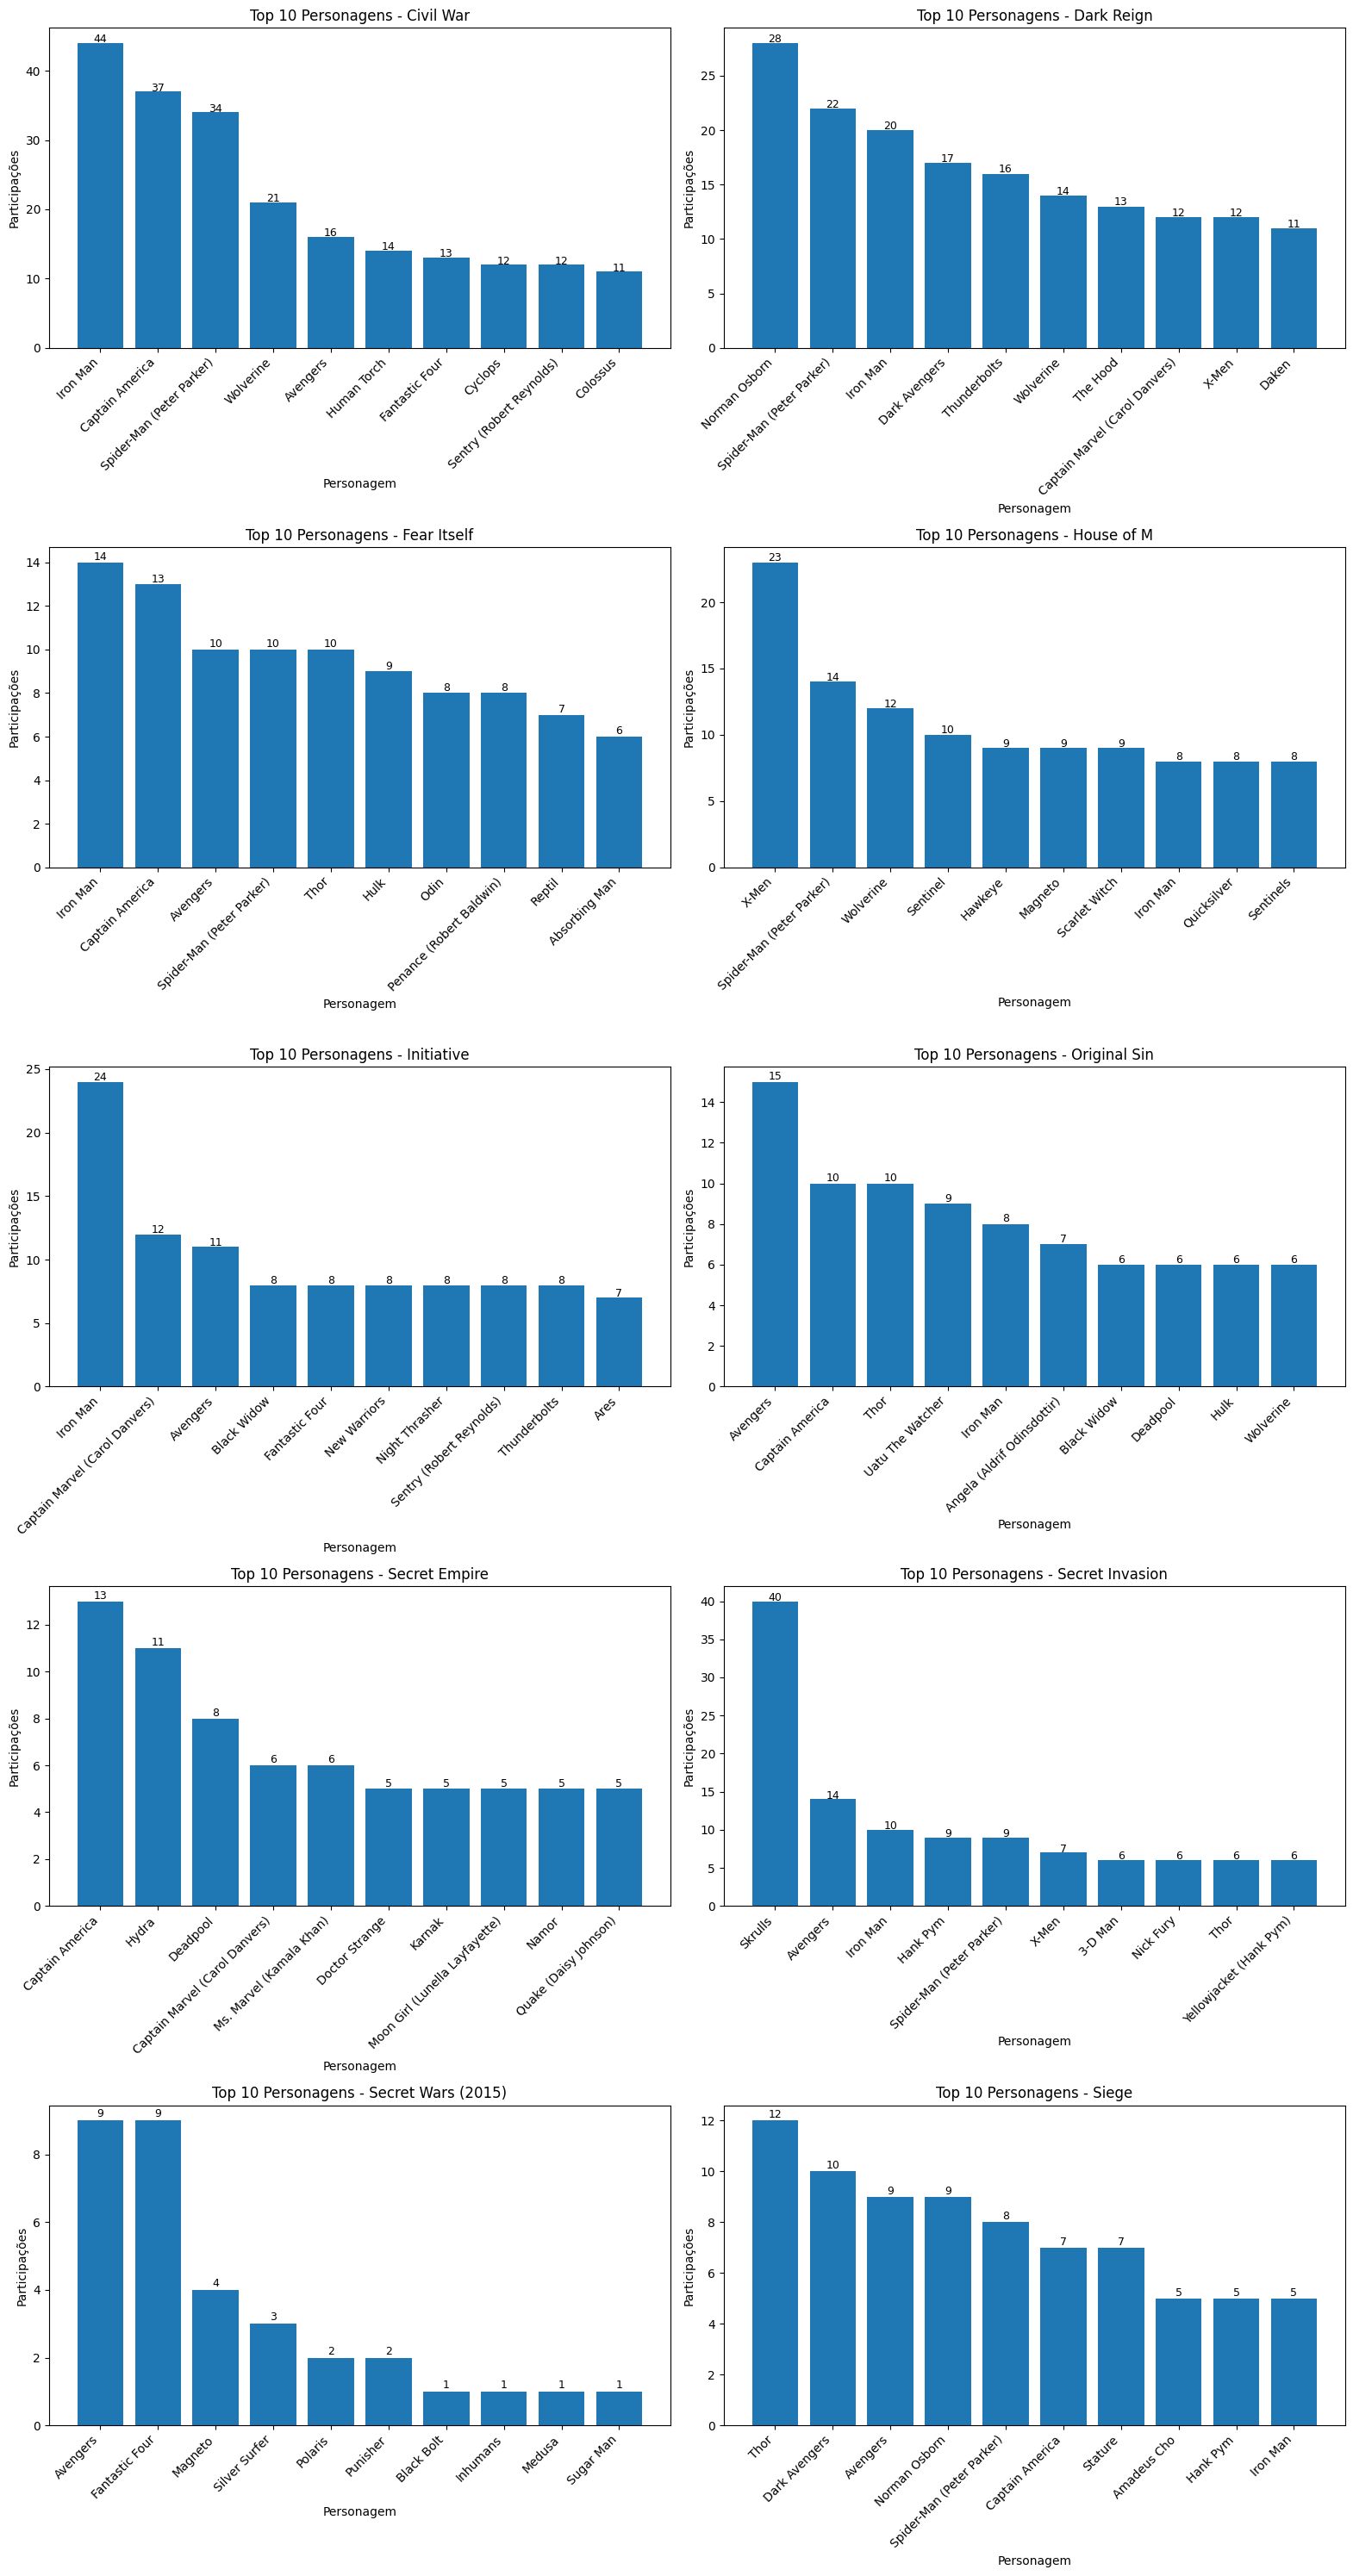

In [11]:
eventos = df_comics['evento'].unique()
eventos.sort()

# Layout dos subplots
num_eventos = len(eventos)
linhas = (num_eventos + 1) // 2
colunas = 2

# Tamanho da figura
plt.figure(figsize=(16, 6 * linhas))

# Loop para criar um subplot por década
for i, dec in enumerate(eventos, 1):
    plt.subplot(linhas, colunas, i)
    dados = df_comics[df_comics['evento'] == dec].sort_values('total_participacoes', ascending=False)

    personagens = dados['personagem']
    participacoes = dados['total_participacoes']

    plt.bar(personagens, participacoes)
    plt.xlabel("Personagem")
    plt.ylabel("Participações")
    plt.title(f"Top 10 Personagens - {dec}")
    plt.xticks(rotation=45, ha='right')

    # Adiciona os valores acima das barras
    for j, v in enumerate(participacoes):
        plt.text(j, v + 0.1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

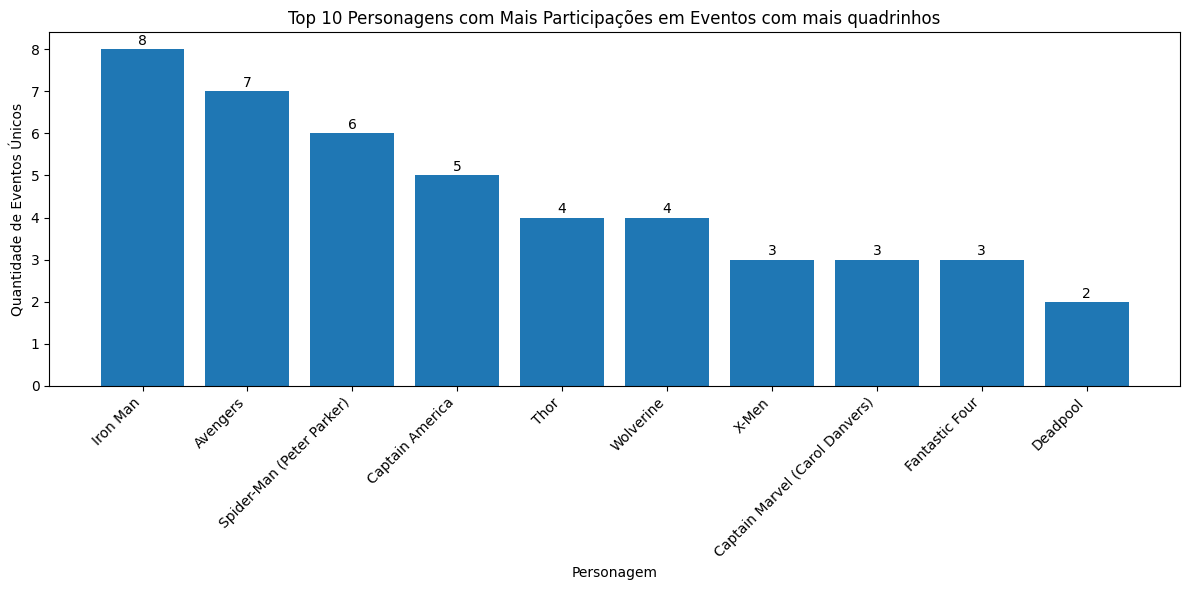

,personagem,quantidade_eventos
23,Iron Man,8
5,Avengers,7
47,Spider-Man (Peter Parker),6
8,Captain America,5
51,Thor,4
54,Wolverine,4
55,X-Men,3
9,Captain Marvel (Carol Danvers),3
16,Fantastic Four,3
14,Deadpool,2


In [12]:
df_eventos_por_personagem = df_comics.groupby('personagem')['evento'].nunique().reset_index()
df_eventos_por_personagem.columns = ['personagem', 'quantidade_eventos']
df_eventos_por_personagem = df_eventos_por_personagem.sort_values(by='quantidade_eventos', ascending=False)

data = df_eventos_por_personagem.head(10)

plt.figure(figsize=(12, 6))
plt.bar(data['personagem'].astype(str), data['quantidade_eventos'])
plt.xlabel("Personagem")
plt.ylabel("Quantidade de Eventos Únicos")
plt.title("Top 10 Personagens com Mais Participações em Eventos com mais quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(data['quantidade_eventos']):
    plt.text(i, v + 0.1, f"{v}", ha='center')

plt.show()
print()
data